In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
#  Load and Prepare Data
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target



In [3]:
# Create a simplified binary classification problem
df['is_setosa'] = (df['target'] == 0).astype(int)

print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  is_setosa  
0       0          1  
1       0          1  
2       0          1  
3       0          1  
4       0          1  


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [5]:
#  Initialize Hypothesis
# Get features (excluding target column)
features = df.columns.drop(['target', 'is_setosa'])

# Get positive examples
positive_examples = df[df['is_setosa'] == 1]
first_positive = positive_examples.iloc[0]

# Initialize hypothesis with the first positive example
hypothesis = {}
for feature in features:
    hypothesis[feature] = first_positive[feature]

print("\nInitial hypothesis:")
print(hypothesis)




Initial hypothesis:
{'sepal length (cm)': 5.1, 'sepal width (cm)': 3.5, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2}


In [6]:
#  Learn Hypothesis using FIND-S
# Iterate through all positive examples
for idx, example in positive_examples.iterrows():
    for feature in features:
        # If the feature value doesn't match the hypothesis
        if hypothesis[feature] != example[feature]:
            hypothesis[feature] = '?'  # Generalize the hypothesis

print("\nFinal hypothesis after learning:")
for feature, value in hypothesis.items():
    print(f"{feature}: {value}")




Final hypothesis after learning:
sepal length (cm): ?
sepal width (cm): ?
petal length (cm): ?
petal width (cm): ?


In [7]:
#  Test Hypothesis
# Select random examples for testing
test_examples = df.sample(5)

print("\nTesting hypothesis on random examples:")
for idx, example in test_examples.iterrows():
    # Test if example satisfies the hypothesis
    satisfies_hypothesis = True
    for feature, value in hypothesis.items():
        if value != '?' and example[feature] != value:
            satisfies_hypothesis = False
            break

    print(f"\nExample {idx}:")
    print(f"Feature values: {example[features].to_dict()}")
    print(f"Predicted: {satisfies_hypothesis}")
    print(f"Actual: {example['is_setosa']}")
    print(f"Correct: {satisfies_hypothesis == example['is_setosa']}")




Testing hypothesis on random examples:

Example 114:
Feature values: {'sepal length (cm)': 5.8, 'sepal width (cm)': 2.8, 'petal length (cm)': 5.1, 'petal width (cm)': 2.4}
Predicted: True
Actual: 0.0
Correct: False

Example 16:
Feature values: {'sepal length (cm)': 5.4, 'sepal width (cm)': 3.9, 'petal length (cm)': 1.3, 'petal width (cm)': 0.4}
Predicted: True
Actual: 1.0
Correct: True

Example 101:
Feature values: {'sepal length (cm)': 5.8, 'sepal width (cm)': 2.7, 'petal length (cm)': 5.1, 'petal width (cm)': 1.9}
Predicted: True
Actual: 0.0
Correct: False

Example 138:
Feature values: {'sepal length (cm)': 6.0, 'sepal width (cm)': 3.0, 'petal length (cm)': 4.8, 'petal width (cm)': 1.8}
Predicted: True
Actual: 0.0
Correct: False

Example 1:
Feature values: {'sepal length (cm)': 4.9, 'sepal width (cm)': 3.0, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2}
Predicted: True
Actual: 1.0
Correct: True



Overall accuracy: 0.33


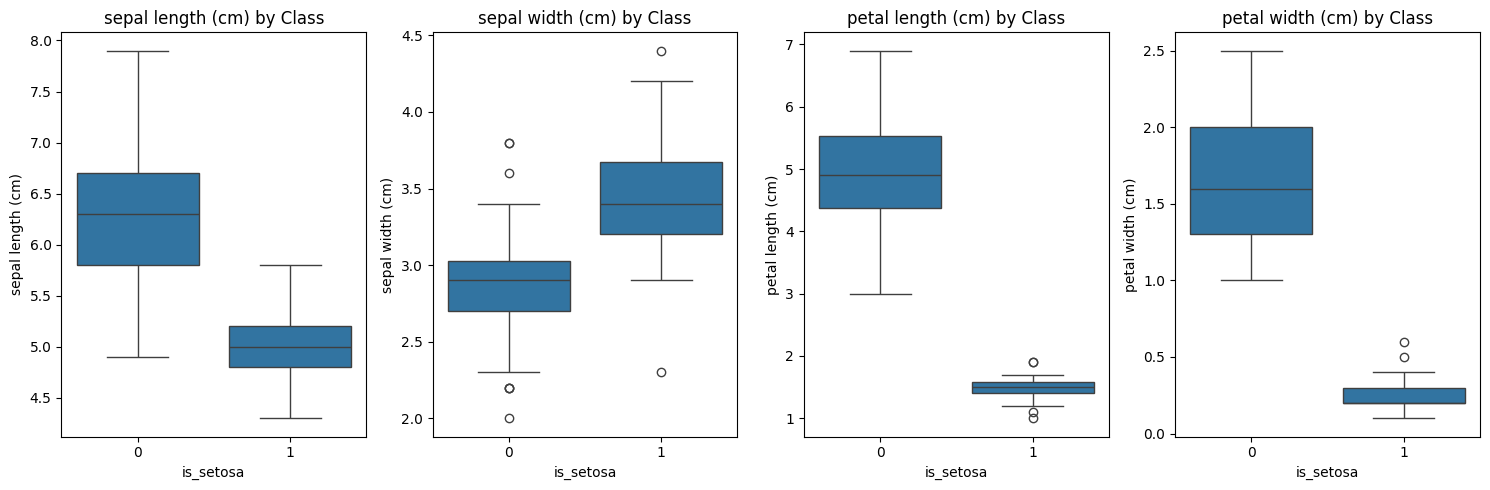

In [8]:
#  Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy on whole dataset
predictions = []
for idx, example in df.iterrows():
    satisfies_hypothesis = True
    for feature, value in hypothesis.items():
        if value != '?' and example[feature] != value:
            satisfies_hypothesis = False
            break
    predictions.append(satisfies_hypothesis)

accuracy = np.mean(predictions == df['is_setosa'])
print(f"\nOverall accuracy: {accuracy:.2f}")

# Visualize feature distributions for Setosa vs non-Setosa
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='is_setosa', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()